In [22]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sympy import *

# 1.  Describe the algorithm 

$$\text{first initialize} ~~(x_0,y_0)~~ \text{from}~uni(0,1)~~\text{,respectively}$$

$$\text{Then sample U from uniform(0,1), and plug in into} ~~ F_{x|y_0}^{-1}(U)=-\frac{1}{y_0} \log\big[1-U(1-\exp^{-y_0B}) \big] = x $$

$$\text{Then sample another U from uniform(0,1), and plug in into} ~~ F_{y|x}^{-1}(U)=-\frac{1}{x}\log\big[1-U(1-\exp^{-xB}) \big] =y $$

$$\text{Repeat for N times } $$

In [35]:
def gibbs(N, thin, B):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    m = np.zeros(shape= (N,2)) 
    for i in range(N):
        for j in range(thin):
            U = np.random.uniform()
            x = (-1/y)*math.log(1-U*(1-math.exp(-B*y)))
            U = np.random.uniform()
            y = (-1/x)*math.log(1-U*(1-math.exp(-B*x)) )                      
        m[i,:] = [x,y]
    return(m)

# 2.  Plot the histogram of values for x.

## T = 500, B = 5

Expection= 1.3583931101921045


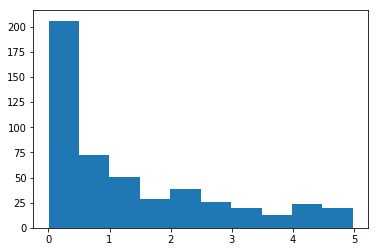

In [36]:
m2 = gibbs(500,10,5)
plt.hist(m2[:,0])
print(f"Expection=", np.mean(m2[:,0]))

## T = 5000, B = 5

Expection= 1.2429921490282938


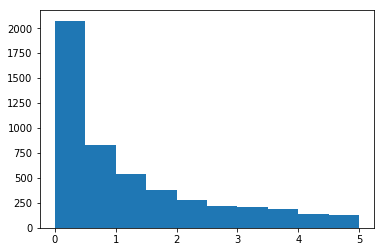

In [37]:
m3 = gibbs(5000,10,5)
plt.hist(m3[:,0])
print(f"Expection=", np.mean(m3[:,0]))

## T = 50000, B = 5

Expection= 1.2568915567578731


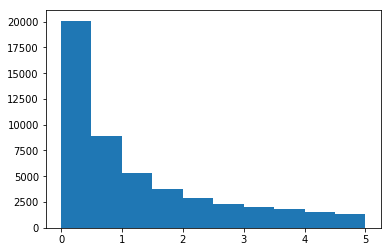

In [38]:
m4 = gibbs(50000,10,5)
plt.hist(m4[:,0])
print(f"Expection=", np.mean(m4[:,0]))

# 3. Estimate of unconditional expectation of X

In [39]:
table = PrettyTable()
table.title = "Gibb sampling estimate of E(X), B = 5"
table.add_column('T', [500,5000,50000])
table.add_column('Estimate', [np.mean(m2[:,0]), np.mean(m3[:,0]), np.mean(m4[:,0])])
print(table)

+---------------------------------------+
| Gibb sampling estimate of E(X), B = 5 |
+----------+----------------------------+
|    T     |          Estimate          |
+----------+----------------------------+
|   500    |     1.3583931101921045     |
|   5000   |     1.2429921490282938     |
|  50000   |     1.2568915567578731     |
+----------+----------------------------+
